In [1]:
!pip install plotly

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df=pd.read_csv("/content/covid_19_clean_complete.csv",parse_dates=["Date"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19220 entries, 0 to 19219
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  8432 non-null   object        
 1   Country/Region  19220 non-null  object        
 2   Lat             19220 non-null  float64       
 3   Long            19220 non-null  float64       
 4   Date            19220 non-null  datetime64[ns]
 5   Confirmed       19219 non-null  float64       
 6   Deaths          19219 non-null  float64       
 7   Recovered       19219 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.2+ MB


In [5]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [6]:
df.rename(columns={"Date":"date","Province/State":"state","Country/Region":"country","Lat":"lat",
                  "Long":"long","Confirmed":"confirmed","Deaths":"deaths","Recovered":"recovered"},inplace=True)

In [ ]:
df

,state,country,lat,long,date,confirmed,deaths,recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
19215,NaN,Jersey,49.1900,-2.1100,2020-03-23,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.5000,2020-03-23,0.0,1.0,0.0
19217,NaN,Republic of the Congo,-1.4400,15.5560,2020-03-23,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.0000,2020-03-23,0.0,0.0,0.0


In [7]:
df["active"]=df["confirmed"]-df["deaths"]-df["recovered"]

In [8]:
df.iloc[100:,:]

,state,country,lat,long,date,confirmed,deaths,recovered,active
100,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0,0.0,0.0
101,Massachusetts,US,42.2302,-71.5301,2020-01-22,0.0,0.0,0.0,0.0
102,Diamond Princess,US,35.4437,139.6380,2020-01-22,0.0,0.0,0.0,0.0
103,Grand Princess,US,37.6489,-122.6655,2020-01-22,0.0,0.0,0.0,0.0
104,Georgia,US,33.0406,-83.6431,2020-01-22,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
19215,NaN,Jersey,49.1900,-2.1100,2020-03-23,0.0,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.5000,2020-03-23,0.0,1.0,0.0,-1.0
19217,NaN,Republic of the Congo,-1.4400,15.5560,2020-03-23,0.0,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.0000,2020-03-23,0.0,0.0,0.0,0.0


In [9]:
df

,state,country,lat,long,date,confirmed,deaths,recovered,active
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,2.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
19215,NaN,Jersey,49.1900,-2.1100,2020-03-23,0.0,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.5000,2020-03-23,0.0,1.0,0.0,-1.0
19217,NaN,Republic of the Congo,-1.4400,15.5560,2020-03-23,0.0,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.0000,2020-03-23,0.0,0.0,0.0,0.0


In [10]:
top=df[df["date"]==df["date"].max()]

In [11]:
top.tail()

,state,country,lat,long,date,confirmed,deaths,recovered,active
19215,NaN,Jersey,49.1900,-2.110,2020-03-23,0.0,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.500,2020-03-23,0.0,1.0,0.0,-1.0
19217,NaN,Republic of the Congo,-1.4400,15.556,2020-03-23,0.0,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.000,2020-03-23,0.0,0.0,0.0,0.0
19219,NaN,The Gambia,13.4667,-16.600,2020-03-23,0.0,0.0,0.0,0.0


In [12]:
world=top.groupby("country")["confirmed","active","deaths","date"].sum().reset_index()

In [13]:
world.head(67)


,country,confirmed,active,deaths
0,Afghanistan,40.0,38.0,1.0
1,Albania,89.0,85.0,2.0
2,Algeria,201.0,119.0,17.0
3,Andorra,113.0,111.0,1.0
4,Angola,2.0,2.0,0.0
...,...,...,...,...
62,"Gambia, The",1.0,1.0,0.0
63,Georgia,54.0,51.0,0.0
64,Germany,24873.0,24513.0,94.0
65,Ghana,24.0,23.0,1.0


In [14]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    183 non-null    object 
 1   confirmed  183 non-null    float64
 2   active     183 non-null    float64
 3   deaths     183 non-null    float64
dtypes: float64(3), object(1)
memory usage: 5.8+ KB


In [15]:
#Choropleth
figure=px.choropleth(world,locations="country",locationmode="country names",color="active",hover_name="country"
                ,range_color=[1,1000],color_continuous_scale="greens",title="Contries with active cases")
figure.show()

In [16]:
#determining total confirmed cases grouped by date
total_cases=df.groupby("date")["date","confirmed"].sum().reset_index()
total_cases

,date,confirmed
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0
...,...,...
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0


[Text(0, 0.5, 'Total cases'), Text(0.5, 0, 'Dates')]

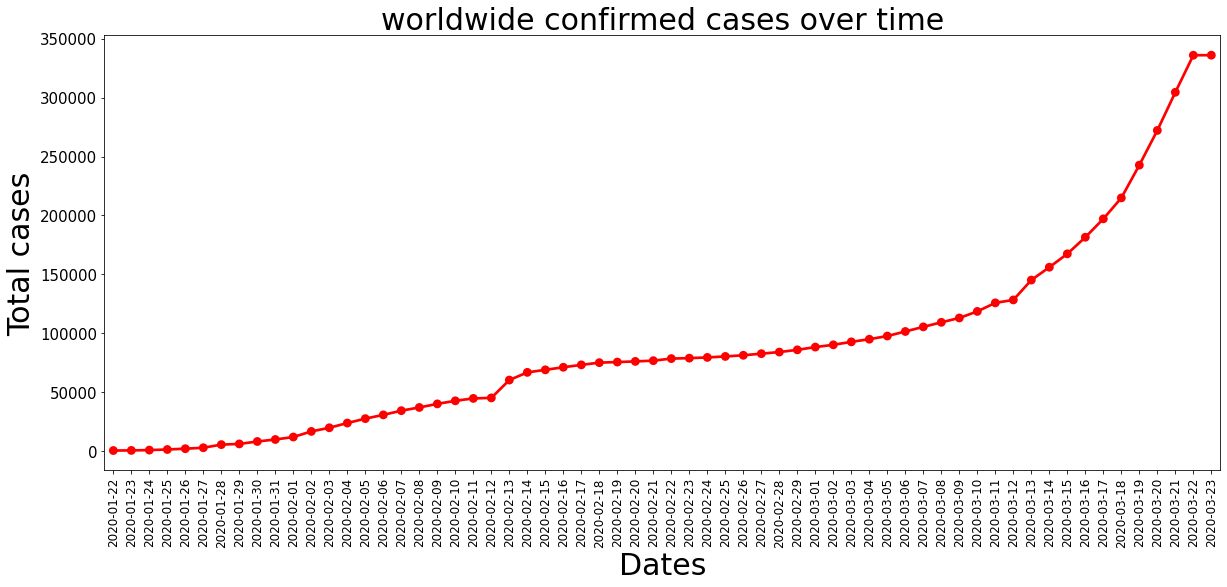

In [17]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("total cases",fontsize=30)
plt.title("worldwide confirmed cases over time",fontsize=30)

ax=sns.pointplot(x=total_cases.date.dt.date,y=total_cases.confirmed,color="r")
ax.set(xlabel="Dates",ylabel="Total cases")

In [18]:
total_cases.date.dt.date

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
57    2020-03-19
58    2020-03-20
59    2020-03-21
60    2020-03-22
61    2020-03-23
Name: date, Length: 62, dtype: object

In [19]:
total_cases.confirmed

0        554.0
1        652.0
2        939.0
3       1432.0
4       2113.0
        ...   
57    242708.0
58    272166.0
59    304524.0
60    335955.0
61    336004.0
Name: confirmed, Length: 62, dtype: float64

In [20]:
#current top countries having most active cases
top_actives=top.groupby("country")["active"].sum().sort_values(ascending=False).head(20).reset_index()
top_actives

,country,active
0,Italy,46638.0
1,US,32681.0
2,Germany,24513.0
3,Spain,24421.0
4,France,13170.0
5,Iran,12022.0
6,Switzerland,7016.0
7,South Korea,5884.0
8,United Kingdom,5392.0
9,China,5351.0


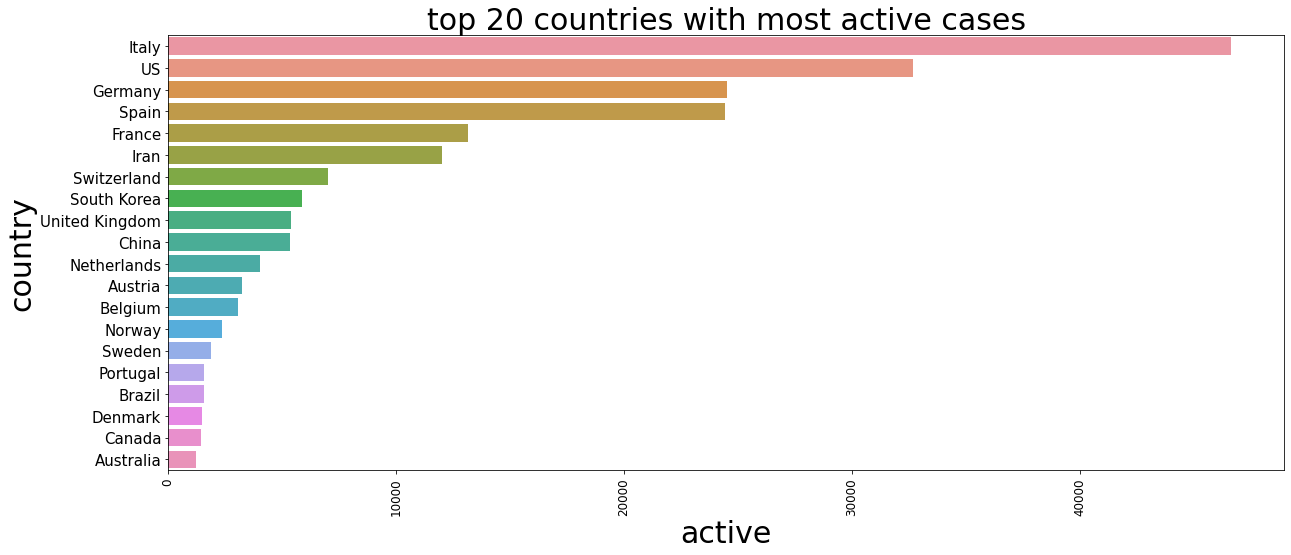

In [21]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("active",fontsize=30)
plt.ylabel("country",fontsize=30)
plt.title("top 20 countries with most active cases",fontsize=30)

ax=sns.barplot(x=top_actives.active,y=top_actives.country)


In [22]:
#Data of China
china=df[df.country=="China"]
china

,state,country,lat,long,date,confirmed,deaths,recovered,active
154,Hubei,China,30.9756,112.2707,2020-01-22,444.0,17.0,28.0,399.0
158,Guangdong,China,23.3417,113.4244,2020-01-22,26.0,0.0,0.0,26.0
159,Henan,China,33.8820,113.6140,2020-01-22,5.0,0.0,0.0,5.0
160,Zhejiang,China,29.1832,120.0934,2020-01-22,10.0,0.0,0.0,10.0
161,Hunan,China,27.6104,111.7088,2020-01-22,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...
19098,Inner Mongolia,China,44.0935,113.9448,2020-03-23,75.0,1.0,74.0,0.0
19099,Ningxia,China,37.2692,106.1655,2020-03-23,75.0,0.0,75.0,0.0
19103,Qinghai,China,35.7452,95.9956,2020-03-23,18.0,0.0,18.0,0.0
19104,Macau,China,22.1667,113.5500,2020-03-23,24.0,0.0,10.0,14.0


In [23]:
china=china.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
china

,date,recovered,deaths,confirmed,active
0,2020-01-22,28.0,17.0,548.0,503.0
1,2020-01-23,30.0,18.0,643.0,595.0
2,2020-01-24,36.0,26.0,920.0,858.0
3,2020-01-25,39.0,42.0,1406.0,1325.0
4,2020-01-26,49.0,56.0,2075.0,1970.0
...,...,...,...,...,...
57,2020-03-19,70535.0,3249.0,81156.0,7372.0
58,2020-03-20,71266.0,3253.0,81250.0,6731.0
59,2020-03-21,71857.0,3259.0,81305.0,6189.0
60,2020-03-22,72362.0,3265.0,81397.0,5770.0


In [24]:
#data of US
us=df[df.country=="US"]
us

,state,country,lat,long,date,confirmed,deaths,recovered,active
98,Washington,US,47.4009,-121.4905,2020-01-22,0.0,0.0,0.0,0.0
99,New York,US,42.1657,-74.9481,2020-01-22,0.0,0.0,0.0,0.0
100,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0,0.0,0.0
101,Massachusetts,US,42.2302,-71.5301,2020-01-22,0.0,0.0,0.0,0.0
102,Diamond Princess,US,35.4437,139.6380,2020-01-22,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
19136,Puerto Rico,US,18.2208,-66.5901,2020-03-23,23.0,1.0,0.0,22.0
19150,Guam,US,13.4443,144.7937,2020-03-23,27.0,1.0,0.0,26.0
19167,Virgin Islands,US,18.3358,-64.8963,2020-03-23,NaN,NaN,NaN,NaN
19210,United States Virgin Islands,US,18.3358,-64.8963,2020-03-23,6.0,0.0,0.0,6.0


In [25]:
us=us.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
us

,date,recovered,deaths,confirmed,active
0,2020-01-22,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...
57,2020-03-19,0.0,200.0,13677.0,13477.0
58,2020-03-20,0.0,244.0,19100.0,18856.0
59,2020-03-21,0.0,307.0,25489.0,25182.0
60,2020-03-22,0.0,417.0,33272.0,32855.0


In [26]:
us=us.iloc[33:].reset_index().drop("index",axis=1)
us

,date,recovered,deaths,confirmed,active
0,2020-02-24,0.0,0.0,36.0,36.0
1,2020-02-25,0.0,0.0,36.0,36.0
2,2020-02-26,0.0,0.0,42.0,42.0
3,2020-02-27,0.0,0.0,42.0,42.0
4,2020-02-28,0.0,0.0,44.0,44.0
5,2020-02-29,0.0,0.0,44.0,44.0
6,2020-03-01,0.0,0.0,44.0,44.0
7,2020-03-02,0.0,0.0,45.0,45.0
8,2020-03-03,0.0,0.0,45.0,45.0
9,2020-03-04,0.0,0.0,45.0,45.0


In [27]:
us.iloc[25:]

,date,recovered,deaths,confirmed,active
25,2020-03-20,0.0,244.0,19100.0,18856.0
26,2020-03-21,0.0,307.0,25489.0,25182.0
27,2020-03-22,0.0,417.0,33272.0,32855.0
28,2020-03-23,178.0,417.0,33276.0,32681.0


In [28]:
#data for italy
italy=df[df.country=="Italy"]
italy=italy.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
italy=italy.iloc[9:].reset_index().drop("index",axis=1)
italy


,date,recovered,deaths,confirmed,active
0,2020-01-31,0.0,0.0,2.0,2.0
1,2020-02-01,0.0,0.0,2.0,2.0
2,2020-02-02,0.0,0.0,2.0,2.0
3,2020-02-03,0.0,0.0,2.0,2.0
4,2020-02-04,0.0,0.0,2.0,2.0
5,2020-02-05,0.0,0.0,2.0,2.0
6,2020-02-06,0.0,0.0,2.0,2.0
7,2020-02-07,0.0,0.0,3.0,3.0
8,2020-02-08,0.0,0.0,3.0,3.0
9,2020-02-09,0.0,0.0,3.0,3.0


In [29]:
italy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       53 non-null     datetime64[ns]
 1   recovered  53 non-null     float64       
 2   deaths     53 non-null     float64       
 3   confirmed  53 non-null     float64       
 4   active     53 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.2 KB


In [30]:
#data for India

india=df[df.country=="India"]
india=india.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
india=india.iloc[8:].reset_index().drop("index",axis=1)
india

,date,recovered,deaths,confirmed,active
0,2020-01-30,0.0,0.0,1.0,1.0
1,2020-01-31,0.0,0.0,1.0,1.0
2,2020-02-01,0.0,0.0,1.0,1.0
3,2020-02-02,0.0,0.0,2.0,2.0
4,2020-02-03,0.0,0.0,3.0,3.0
5,2020-02-04,0.0,0.0,3.0,3.0
6,2020-02-05,0.0,0.0,3.0,3.0
7,2020-02-06,0.0,0.0,3.0,3.0
8,2020-02-07,0.0,0.0,3.0,3.0
9,2020-02-08,0.0,0.0,3.0,3.0


In [31]:
india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       54 non-null     datetime64[ns]
 1   recovered  54 non-null     float64       
 2   deaths     54 non-null     float64       
 3   confirmed  54 non-null     float64       
 4   active     54 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.2 KB


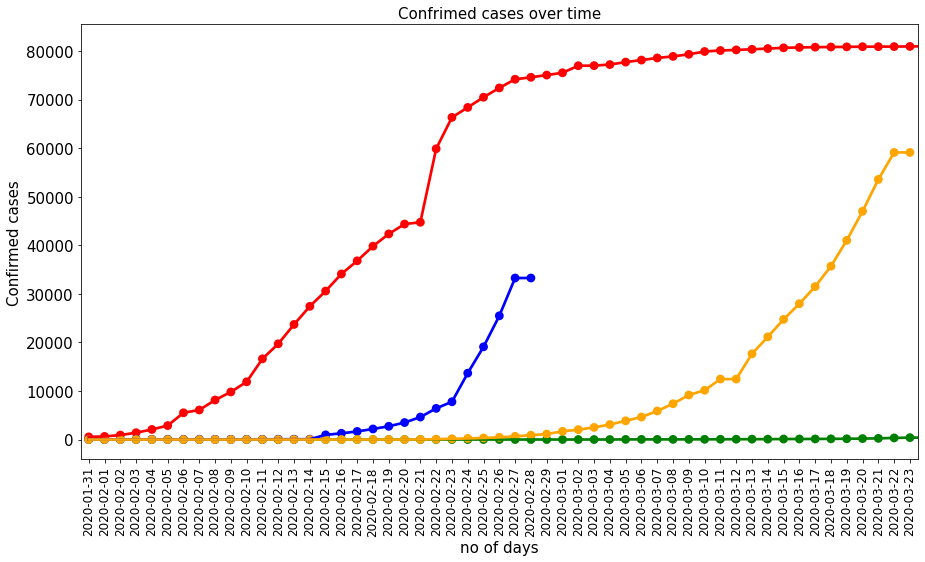

In [32]:
#confirmed
plt.figure(figsize=(15,8))
sns.pointplot(china.date.dt.date,china.confirmed,color="red")
sns.pointplot(india.date.dt.date,india.confirmed,color="green")
sns.pointplot(us.date.dt.date,us.confirmed,color="blue")
sns.pointplot(italy.date.dt.date,italy.confirmed,color="orange")
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("no of days",fontsize=15)
plt.ylabel("Confirmed cases",fontsize=15)
plt.title("Confrimed cases over time",fontsize=15)
plt.show()

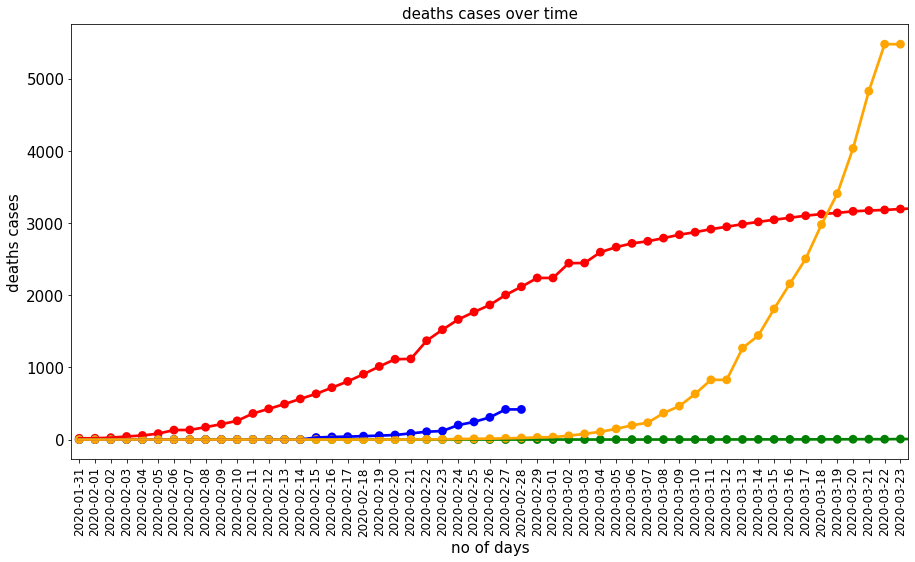

In [33]:
#deaths
plt.figure(figsize=(15,8))
sns.pointplot(china.date.dt.date,china.deaths,color="red")
sns.pointplot(india.date.dt.date,india.deaths,color="green")
sns.pointplot(us.date.dt.date,us.deaths,color="blue")
sns.pointplot(italy.date.dt.date,italy.deaths,color="orange")
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("no of days",fontsize=15)
plt.ylabel("deaths cases",fontsize=15)
plt.title("deaths cases over time",fontsize=15)
plt.show()

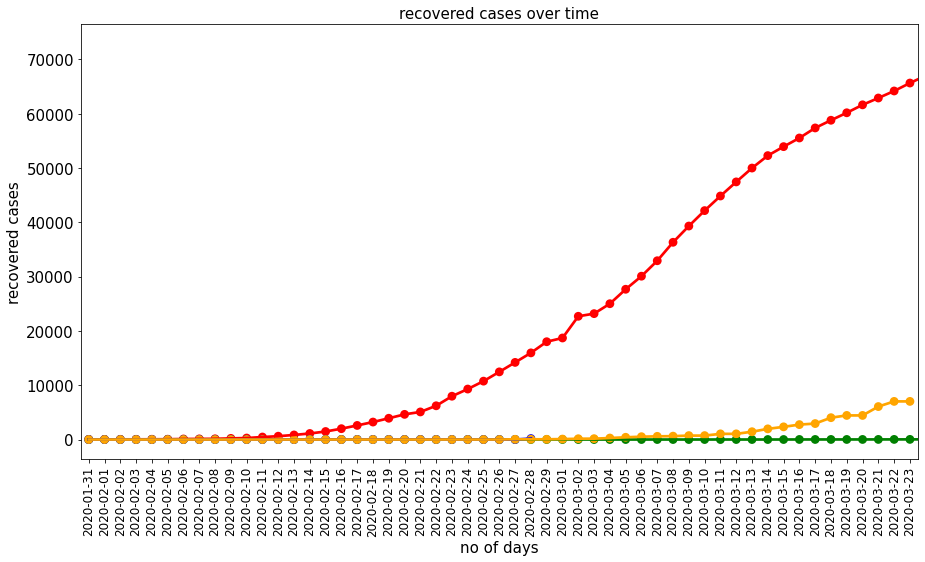

In [34]:
#recovered
plt.figure(figsize=(15,8))
sns.pointplot(china.date.dt.date,china.recovered,color="red")
sns.pointplot(india.date.dt.date,india.recovered,color="green")
sns.pointplot(us.date.dt.date,us.recovered,color="blue")
sns.pointplot(italy.date.dt.date,italy.recovered,color="orange")
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("no of days",fontsize=15)
plt.ylabel("recovered cases",fontsize=15)
plt.title("recovered cases over time",fontsize=15)
plt.show()

# Detailed Analysis Of covid cases in India

In [35]:
df_india=pd.read_excel("/content/covid_19_india.xlsx")

In [36]:
df_india

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [37]:
df_india["Total_cases"]=df_india["Total Confirmed cases (Indian National)"]+df_india["Total Confirmed cases ( Foreign National )"]

In [38]:
df_india

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_cases
0,1,Andhra Pradesh,9,0,0,0,9
1,2,Bihar,3,0,0,1,3
2,3,Chhattisgarh,1,0,0,0,1
3,4,Delhi,30,1,6,1,31
4,5,Gujarat,32,1,0,1,33
5,6,Haryana,14,14,11,0,28
6,7,Himachal Pradesh,3,0,0,1,3
7,8,Karnataka,41,0,3,1,41
8,9,Kerala,101,8,4,0,109
9,10,Madhya Pradesh,9,0,0,0,9


In [39]:
df_india["Total active"]=df_india["Total_cases"]-df_india["Death"]-df_india["Cured"]

In [40]:
df_india

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_cases,Total active
0,1,Andhra Pradesh,9,0,0,0,9,9
1,2,Bihar,3,0,0,1,3,2
2,3,Chhattisgarh,1,0,0,0,1,1
3,4,Delhi,30,1,6,1,31,24
4,5,Gujarat,32,1,0,1,33,32
5,6,Haryana,14,14,11,0,28,17
6,7,Himachal Pradesh,3,0,0,1,3,2
7,8,Karnataka,41,0,3,1,41,37
8,9,Kerala,101,8,4,0,109,105
9,10,Madhya Pradesh,9,0,0,0,9,9


In [41]:
tot_cases=df_india.groupby("Name of State / UT")["Total active"].sum().sort_values(ascending=False).to_frame()

In [42]:
tot_cases

,Total active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


In [43]:
tot_cases.style.background_gradient(cmap="hot_r")

,Total active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


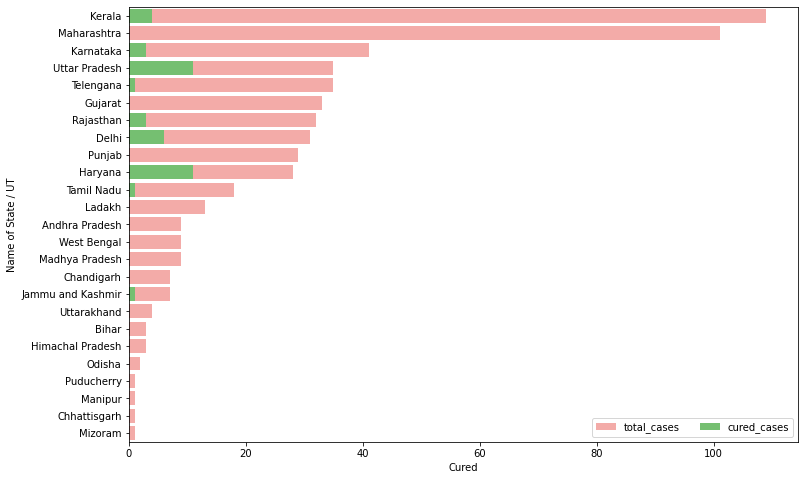

In [44]:
#total_cases and cured
f,ax=plt.subplots(figsize=(12,8))
data=df_india[["Name of State / UT","Total_cases","Cured","Death"]]
data.sort_values("Total_cases",ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total_cases",y="Name of State / UT",data=data,label="total_cases",color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured",y="Name of State / UT",data=data,label="cured_cases",color="g")

ax.legend(ncol=2,loc="lower right",frameon=True)

In [46]:
#perday Analysis
dbd_india=pd.read_excel("/content/per_day_cases.xlsx")

In [47]:
dbd_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             56 non-null     datetime64[ns]
 1   Total Cases                      56 non-null     int64         
 2   New Cases                        56 non-null     int64         
 3   Days after surpassing 100 cases  12 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.9 KB


In [48]:
#trend of covid cases in india
fig=go.Figure()
fig.add_trace(go.Scatter(x=dbd_india["Date"],y=dbd_india["Total Cases"],mode="lines+markers",name="Total Cases"))
fig.update_layout(title_text="Trend of Coronavirus cases in India",plot_bgcolor="rgb(230,230,230)")
fig.show()

In [49]:
#coronaviruscases in India on daily basis
fig=px.bar(dbd_india,x="Date",y="New Cases", barmode="group",height=400)
fig.update_layout(title_text="Coronaviruscases in India on daily basis",plot_bgcolor="rgb(230,230,230)")
fig.show()

# Insights into Covid cases Globally

In [50]:
df_confirmed=pd.read_csv("/content/time_series_covid19_confirmed_global.csv")
df_recovered=pd.read_csv("/content/time_series_covid19_deaths_global.csv")
df_deaths=pd.read_csv("/content/time_series_covid19_recovered_global.csv")

In [51]:
df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,NaN,Timor-Leste,-8.874217,125.727539,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
237,NaN,Belize,13.193900,-59.543200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
238,Recovered,Canada,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
239,NaN,Laos,19.856270,102.495496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [52]:
df_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,NaN,Timor-Leste,-8.874217,125.727539,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
237,NaN,Belize,13.193900,-59.543200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
238,Recovered,Canada,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
239,NaN,Laos,19.856270,102.495496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,5,5,5,5,5,5,5,5,5,5,5,10,10,10,10,10,12,12,12,14,15,15,15,15,17,17,21,21,22,22,22,28,28,28,31,31,31,31,31,31,31,31,33,34,34,35,35,35,35,41,42,42,42,42,44,44.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,9,9,9,9,12,12,12,13,18,18,22,22,22,22,22,22,22,22,32,32,32,43,43,43,46,76,76,76,101,118,118,118,118,118,144,144,144,150,191,232,235,235.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,9,15,15,17,18,18,24,29,34,34,37,37,51,51,53,62,62,62,72,72,78,78,78,78,78,78,78,78,78,96,96,97,105,105,109,114,114,114,124,140,144,144.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,3,7,7,7,13,15,15,15,15,15,18,18,18,18,18,18,18,18,22,22,22,22,23,24,24,24,26,26,26,35,42,42,49,60,75,87,114,139,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,Jersey,49.1900,-2.1100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
497,NaN,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
498,NaN,Republic of the Congo,-1.4400,15.5560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
499,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [54]:
df_confirmed.rename(columns={"Country/Region":"Country"},inplace=True)
df_recovered.rename(columns={"Country/Region":"Country"},inplace=True)
df_deaths.rename(columns={"Country/Region":"Country"},inplace=True)

In [55]:
df_india_cases=df.query('country== "India"').groupby("date")[["confirmed","deaths","recovered"]].sum().reset_index()
india_confirmed,india_deaths,india_recovered =df_india_cases[["date","confirmed"]],df_india_cases[["date","deaths"]],df_india_cases[["date","recovered"]]


In [56]:
df_india_cases

,date,confirmed,deaths,recovered
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
...,...,...,...,...
57,2020-03-19,194.0,4.0,15.0
58,2020-03-20,244.0,5.0,20.0
59,2020-03-21,330.0,4.0,23.0
60,2020-03-22,396.0,7.0,27.0


In [57]:
df.groupby("date").sum().head()

,lat,long,confirmed,deaths,recovered,active
date,,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0,509.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0,604.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0,877.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0,1351.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0,2005.0


In [58]:
confirmed=df.groupby("date").sum()["confirmed"].reset_index()
deaths=df.groupby("date").sum()["deaths"].reset_index()
recovered=df.groupby("date").sum()["recovered"].reset_index()

In [59]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed["date"],y=confirmed["confirmed"],mode="lines+markers",name="confirmed",line=dict(color="blue")))
fig.add_trace(go.Scatter(x=deaths["date"],y=deaths["deaths"],mode="lines+markers",name="deaths",line=dict(color="red")))
fig.add_trace(go.Scatter(x=recovered["date"],y=recovered["recovered"],mode="lines+markers",name="recovered",line=dict(color="green")))
fig.update_layout(title_text="World wide COVID_19 Cases",xaxis_tickfont_size=14,yaxis=dict(title="Number of cases"),plot_bgcolor="rgb(230,230,230)")
fig.show()